<a href="https://colab.research.google.com/github/nitsundon/100DaysofML/blob/main/Day01/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import numpy as np

In [24]:
df= pd.read_pickle("/content/drive/MyDrive/Libraries/pickle/preprocessed_demand_df.pkl")
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)
df.head()


,demand
datetime,
2022-01-01 00:00:00,15798.000000
2022-01-01 00:15:00,15775.333333
2022-01-01 00:30:00,15667.285714
2022-01-01 00:45:00,15813.000000
2022-01-01 01:00:00,15837.000000


In [58]:
df.loc[df['demand'] < 10000, 'demand'] = np.nan

In [79]:
df1=df.interpolate().iloc[-20000:]

<Axes: xlabel='datetime'>

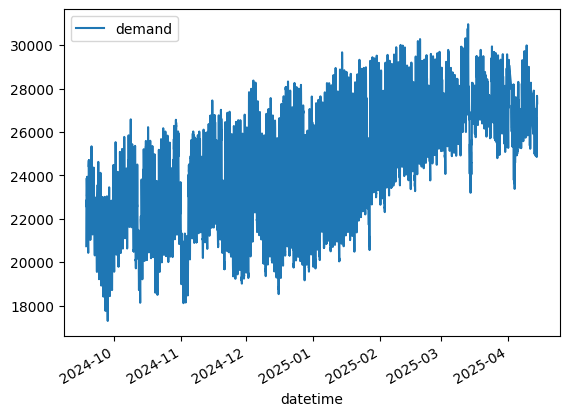

In [80]:
df1.plot()

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
df1 = df1[~df1.index.duplicated(keep='first')]

df1=df1.asfreq('1D')
df1=df1.interpolate()
df1.head()

,demand
datetime,
2024-09-18 05:30:00,20741.916667
2024-09-19 05:30:00,22390.636364
2024-09-20 05:30:00,22944.200000
2024-09-21 05:30:00,22820.727273
2024-09-22 05:30:00,21572.272727


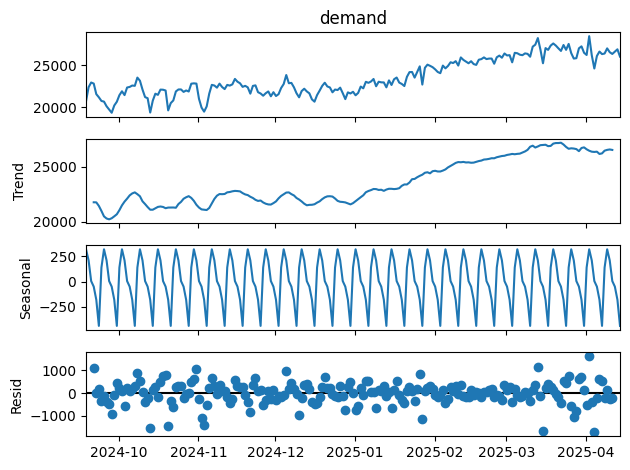

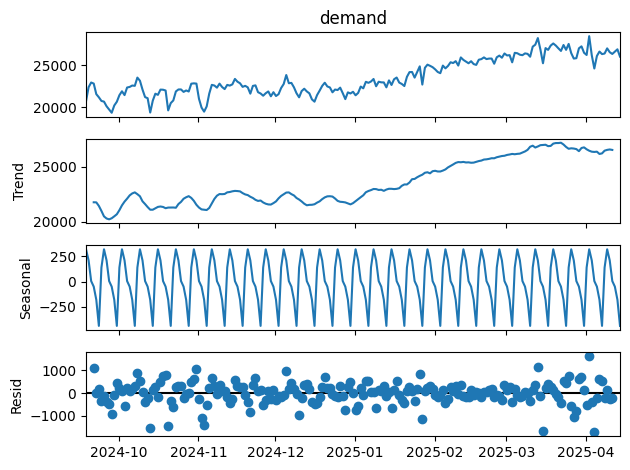

In [83]:
decomposition = seasonal_decompose(df1['demand'],model='additive')
decomposition.plot()

In [84]:
len(df1)

209

In [85]:
train=df1.iloc[:-30]
test= df1.iloc[-30:]

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [87]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [89]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [95]:
n_input=15
n_features=1
gen=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)
X,y=gen[0]

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [98]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.fit(gen,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0355
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0086
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0089
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0093
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0068
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0077
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0099
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0076
Epoch 9/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0069
Epoch 10/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0071
Epoch 11/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0079
Epoch 12/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0081
Epoch 13/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0093
Epoch 14/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0075
Epoch 15/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step 

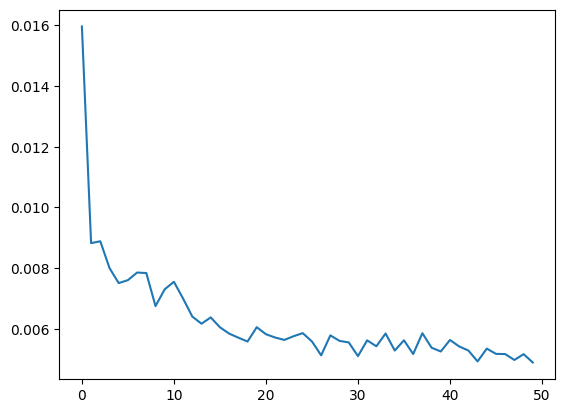

In [101]:
from matplotlib import pyplot as plt
losses=pd.DataFrame(model.history.history)
plt.plot(range(len(losses)),losses)

In [102]:
last_train_batch=scaled_train[-n_input:]
last_train_batch=last_train_batch.reshape((1,n_input,n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


array([[0.7772527]], dtype=float32)

In [103]:
scaled_test[0]

array([0.86566234])

In [104]:
test_predicitions= []
final_eval_batch=scaled_train[-n_input:]
current_batch=final_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]
  test_predicitions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

In [108]:
test

,demand,predictions
datetime,,
2025-03-16 05:30:00,27008.600000,26228.667640
2025-03-17 05:30:00,26799.000000,26742.048566
2025-03-18 05:30:00,27306.100000,27000.994009
2025-03-19 05:30:00,27557.100000,27169.121355
2025-03-20 05:30:00,27309.600000,27298.154490
2025-03-21 05:30:00,26982.181818,27413.180826
2025-03-22 05:30:00,26674.900000,27525.108503
2025-03-23 05:30:00,27373.900000,27636.165948
2025-03-24 05:30:00,26804.500000,27746.569272


In [106]:
true_predictions=scaler.inverse_transform(test_predicitions)
test['predictions']=true_predictions


<ipython-input-106-e6b4f121aed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


<Axes: xlabel='datetime'>

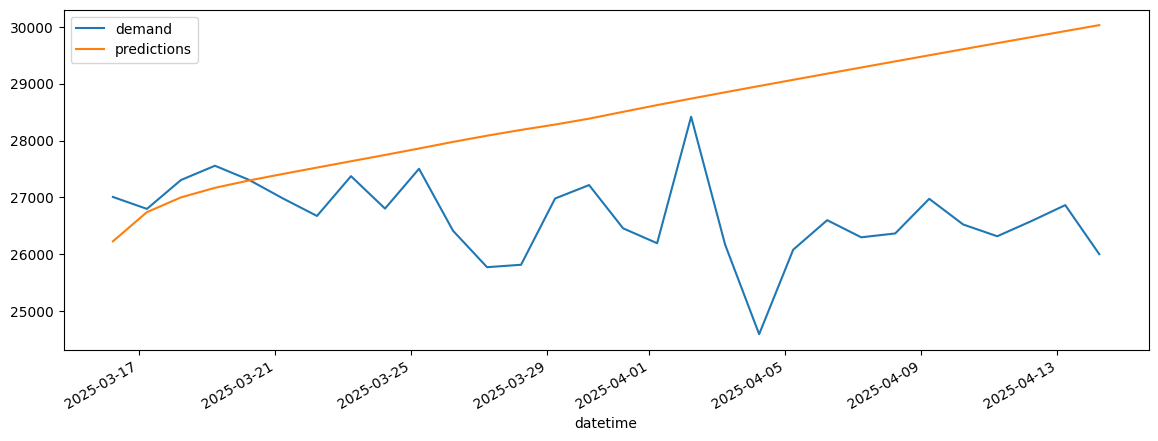

In [107]:
test.plot(figsize=(14,5))